In [186]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configure plotting
%matplotlib inline
sns.set(style='whitegrid')

In [272]:
# Load dataset from the provided URL or local file
# Replace 'path_to_your_file.csv' with the actual path or URL of your dataset
df = pd.read_csv('data/welddb_data.csv')

# Display the first few rows
df.head()

,Carbon concentration / weight %,Silicon concentration / weight %,Manganese concentration / weight %,Sulphur concentration / weight %,Phosphorus concentration / weight %,Nickel concentration / weight %,Chromium concentration / weight %,Molybdenum concentration / weight %,Vanadium concentration / weight %,Copper concentration / weight %,...,Charpy temperature,Charpy impact toughness / J,Hardness / kg mm^{-2},50% FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,-28.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,-38.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,-48.0,100.0,NaN,NaN,32,28.0,40.0,0.0,0.0,Evans-Ni/CMn-1990/1991-0Bawch


In [273]:
# Get information about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Carbon concentration / weight %                        1652 non-null   float64
 1   Silicon concentration / weight %                       1652 non-null   float64
 2   Manganese concentration / weight %                     1652 non-null   float64
 3   Sulphur concentration / weight %                       1648 non-null   object 
 4   Phosphorus concentration / weight %                    1642 non-null   float64
 5   Nickel concentration / weight %                        697 non-null    float64
 6   Chromium concentration / weight %                      784 non-null    float64
 7   Molybdenum concentration / weight %                    793 non-null    object 
 8   Vanadium concentration / weight %               

In [274]:
# In all non-numeric columns, print all values that can not be converted to numeric
for column in df.columns:
    if df[column].dtype == 'object':
        print(column)
        for value in df[column].unique():
            try:
                float(value)
            except ValueError:
                print(value, ":", round(100*df[column].value_counts()[value]/len(df), 2), "%")
        print()

Sulphur concentration / weight %
<0.002 : 0.42 %

Molybdenum concentration / weight %
<0.01 : 0.12 %

Vanadium concentration / weight %
<0.0005 : 16.1 %
<0.01 : 1.88 %
<0.005 : 0.12 %
<5 : 0.54 %

Copper concentration / weight %
<0.01 : 0.85 %

Cobalt concentration / weight %
<0.01 : 1.27 %

Tungsten concentration / weight %
<0.1 : 0.73 %

Titanium concentration / parts per million by weight
<5 : 0.12 %
<100 : 3.03 %
<0.01 : 0.97 %
<10 : 0.12 %

Nitrogen concentration / parts per million by weight
67tot33res : 0.42 %
66totndres : 0.67 %
61tot34res : 0.42 %
54totndres : 0.36 %
54tot24res : 0.42 %
52tot18res : 0.42 %
50tot17res : 0.42 %
48tot18res : 0.42 %

Aluminium concentration / parts per million by weight
<5 : 20.76 %
<50 : 0.36 %
<100 : 2.3 %
<0.01 : 0.97 %

Boron concentration / parts per million by weight
<5 : 23.91 %
<10 : 1.45 %

Niobium concentration / parts per million by weight
<5 : 17.19 %
<6 : 0.18 %
<100 : 0.54 %
<50 : 0.18 %

Tin concentration / parts per million by weig

In [275]:
# In columns with "<X" or ">X" values, replace them with the value of X. Try to convert the column to numeric type.
columns_to_convert = ["Sulphur concentration / weight %",
                      "Molybdenum concentration / weight %",
                      "Vanadium concentration / weight %",
                      "Copper concentration / weight %",
                      "Cobalt concentration / weight %",
                      "Tungsten concentration / weight %",
                      "Titanium concentration / parts per million by weight",
                      "Nitrogen concentration / parts per million by weight",
                      "Aluminium concentration / parts per million by weight",
                      "Boron concentration / parts per million by weight",
                      "Niobium concentration / parts per million by weight",
                      "Tin concentration / parts per million by weight",
                      "Arsenic concentration / parts per million by weight",
                      "Antimony concentration / parts per million by weight"
                      ]

df[columns_to_convert] = df[columns_to_convert].replace({'<': '', '>': ''}, regex=True)

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Carbon concentration / weight %                        1652 non-null   float64
 1   Silicon concentration / weight %                       1652 non-null   float64
 2   Manganese concentration / weight %                     1652 non-null   float64
 3   Sulphur concentration / weight %                       1648 non-null   float64
 4   Phosphorus concentration / weight %                    1642 non-null   float64
 5   Nickel concentration / weight %                        697 non-null    float64
 6   Chromium concentration / weight %                      784 non-null    float64
 7   Molybdenum concentration / weight %                    793 non-null    float64
 8   Vanadium concentration / weight %               

In [276]:
# Get descriptive statistics for numerical columns
df.describe()

,Carbon concentration / weight %,Silicon concentration / weight %,Manganese concentration / weight %,Sulphur concentration / weight %,Phosphorus concentration / weight %,Nickel concentration / weight %,Chromium concentration / weight %,Molybdenum concentration / weight %,Vanadium concentration / weight %,Copper concentration / weight %,...,Ultimate tensile strength / MPa,Elongation / %,Reduction of Area / %,Charpy temperature,Charpy impact toughness / J,50% FATT,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %
count,1652.000000,1652.000000,1652.000000,1648.000000,1642.000000,697.000000,784.000000,793.000000,928.000000,578.000000,...,738.000000,700.000000,705.000000,879.000000,879.00000,31.000000,90.000000,90.000000,89.000000,89.000000
mean,0.075521,0.328577,1.202821,0.009529,0.012952,0.415034,2.101273,0.479172,0.097379,0.172163,...,594.386314,26.275714,71.799858,-34.606371,87.68942,-31.096774,25.955556,52.833333,0.337079,0.438202
std,0.023898,0.112455,0.382137,0.011226,0.019627,0.786951,3.026548,0.477404,0.492889,0.322933,...,88.636238,4.895986,8.926551,34.738624,50.11670,43.644285,21.283486,23.483798,3.179994,1.397685
min,0.029000,0.040000,0.270000,0.001000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,447.000000,10.600000,17.000000,-114.000000,3.00000,-126.000000,3.000000,0.000000,0.000000,0.000000
25%,0.061750,0.270000,0.940000,0.006000,0.007000,0.000000,0.000000,0.000000,0.000500,0.000000,...,532.775000,22.800000,68.000000,-60.000000,38.00000,-62.000000,9.000000,35.500000,0.000000,0.000000
50%,0.074000,0.320000,1.270000,0.007000,0.010000,0.067000,0.530000,0.340000,0.009500,0.030000,...,575.500000,26.800000,75.000000,-40.000000,100.00000,-15.000000,18.000000,60.000000,0.000000,0.000000
75%,0.086000,0.360000,1.440000,0.010000,0.014000,0.260000,2.300000,1.010000,0.044000,0.180000,...,647.000000,30.000000,78.000000,-17.500000,100.00000,5.000000,38.000000,71.750000,0.000000,0.000000
max,0.180000,1.140000,2.250000,0.140000,0.250000,3.500000,10.200000,1.500000,5.000000,1.630000,...,1151.000000,37.000000,83.000000,188.000000,270.00000,30.000000,100.000000,88.000000,30.000000,8.000000


In [277]:
# Display column names to verify units
print("Column Names and Units:")
for col in df.columns:
    print(f"- {col}")

Column Names and Units:
- Carbon concentration / weight %
- Silicon concentration / weight %
- Manganese concentration / weight %
- Sulphur concentration / weight %
- Phosphorus concentration / weight %
- Nickel concentration / weight %
- Chromium concentration / weight %
- Molybdenum concentration / weight %
- Vanadium concentration / weight %
- Copper concentration / weight %
- Cobalt concentration / weight %
- Tungsten concentration / weight %
- Oxygen concentration / parts per million by weight
- Titanium concentration / parts per million by weight
- Nitrogen concentration / parts per million by weight
- Aluminium concentration / parts per million by weight
- Boron concentration / parts per million by weight
- Niobium concentration / parts per million by weight
- Tin concentration / parts per million by weight
- Arsenic concentration / parts per million by weight
- Antimony concentration / parts per million by weight
- Current / A
- Voltage / V
- AC or DC
- Electrode positive or ne

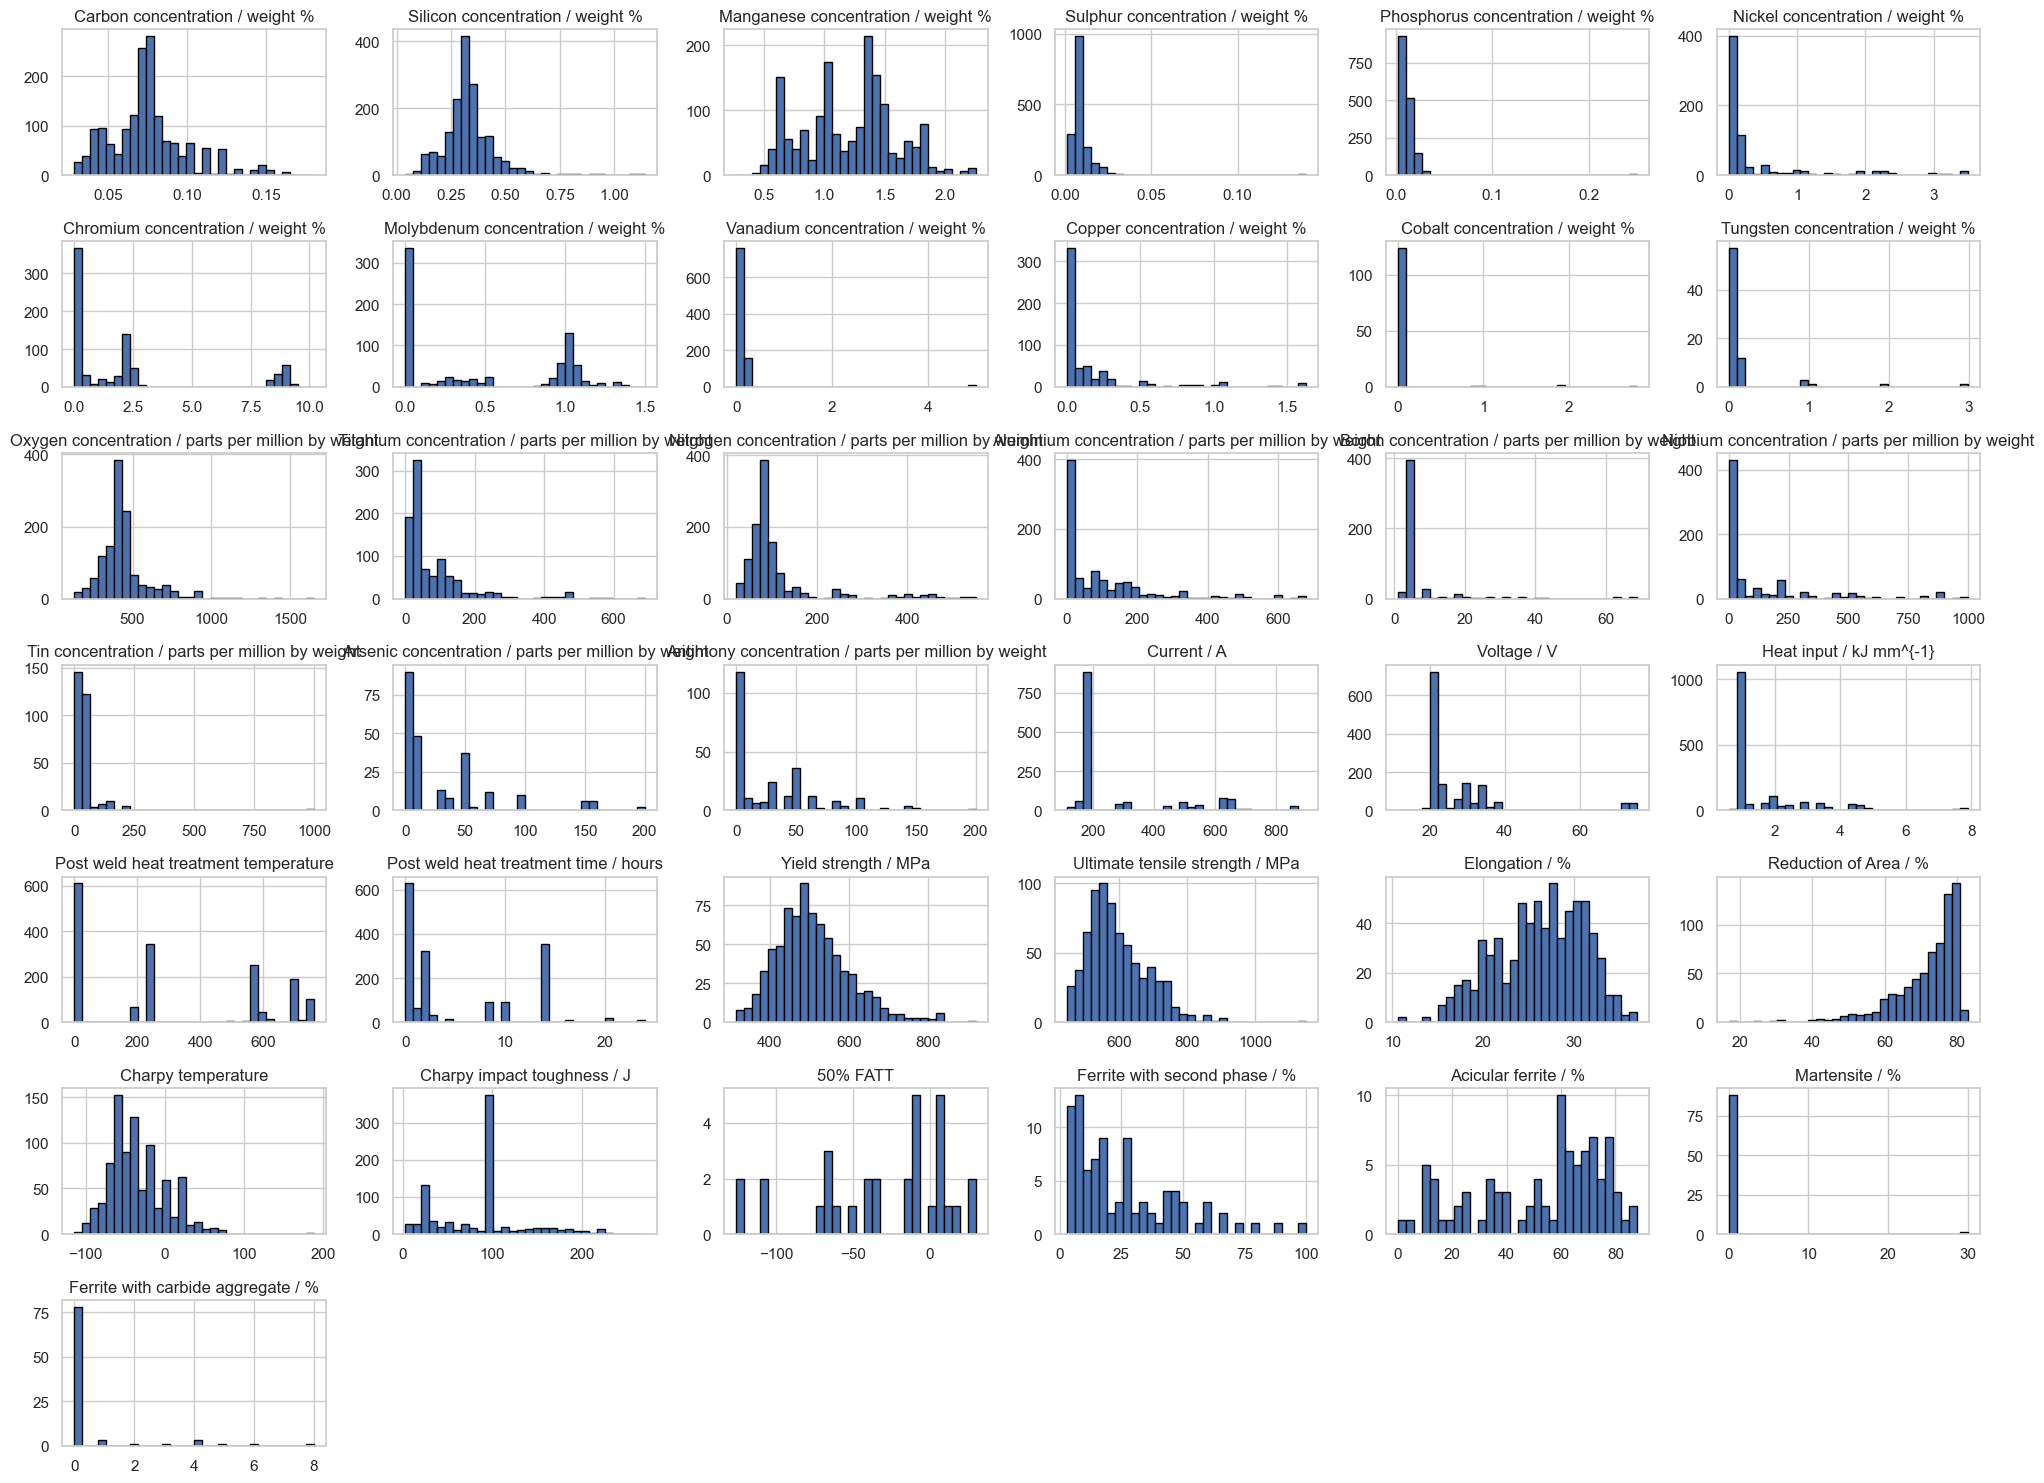

In [278]:
# Plot histograms for numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_cols].hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# Identifying Variables Representing Weld Quality

## Actions:

- Determine variables indicative of weld quality (e.g., mechanical properties).
- Understand the significance of these variables in the context of welding.
- Analyze correlations between potential target variables and features.

## Strategy Development:
- Select the target variable(s) for prediction.
- Justify the choice based on data availability and relevance.
- Plan the approach to predict weld quality from identified variables.
  

In [279]:
df.columns

Index(['Carbon concentration / weight %', 'Silicon concentration / weight %',
       'Manganese concentration / weight %',
       'Sulphur concentration / weight %',
       'Phosphorus concentration / weight %',
       'Nickel concentration / weight %', 'Chromium concentration / weight %',
       'Molybdenum concentration / weight %',
       'Vanadium concentration / weight %', 'Copper concentration / weight %',
       'Cobalt concentration / weight %', 'Tungsten concentration / weight %',
       'Oxygen concentration / parts per million by weight',
       'Titanium concentration / parts per million by weight',
       'Nitrogen concentration / parts per million by weight',
       'Aluminium concentration / parts per million by weight',
       'Boron concentration / parts per million by weight',
       'Niobium concentration / parts per million by weight',
       'Tin concentration / parts per million by weight',
       'Arsenic concentration / parts per million by weight',
       'Anti

In [280]:
# List potential weld quality variables
potential_targets = [
    'Yield strength / MPa',
    'Ultimate tensile strength / MPa',
    'Elongation / %',
    'Reduction of Area / %',
    'Charpy impact toughness / J',
]

# Check availability and missing values of potential target variables
missing_values_targets = df[potential_targets].isnull().sum()
print("Missing values in potential target variables (out of", len(df), "rows):")
print(missing_values_targets)

Missing values in potential target variables (out of 1652 rows):
Yield strength / MPa               872
Ultimate tensile strength / MPa    914
Elongation / %                     952
Reduction of Area / %              947
Charpy impact toughness / J        773
dtype: int64


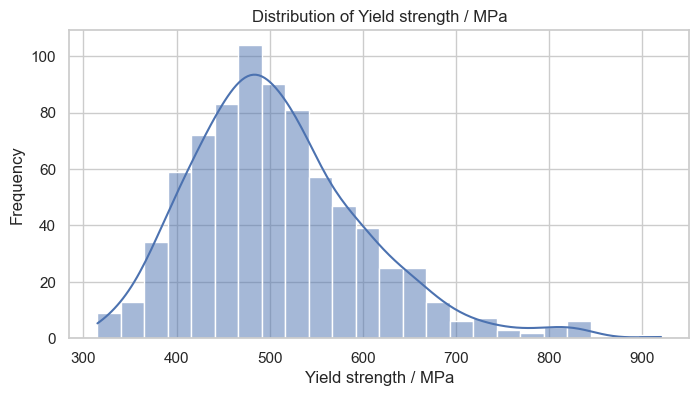

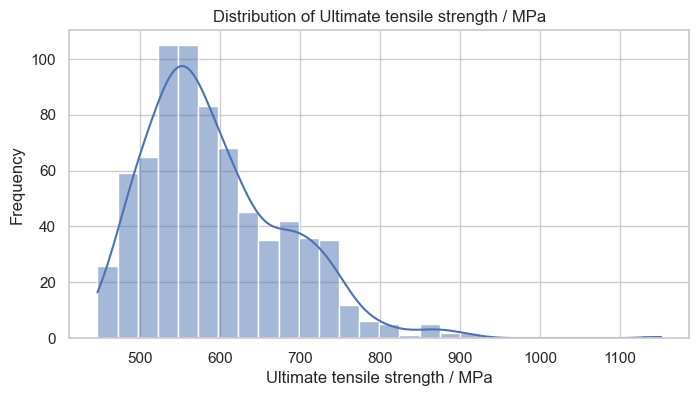

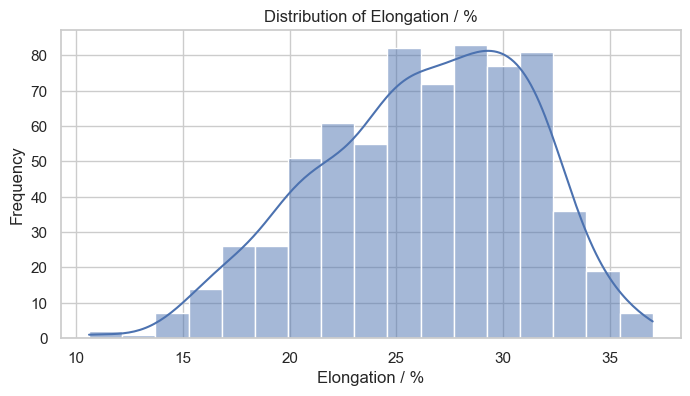

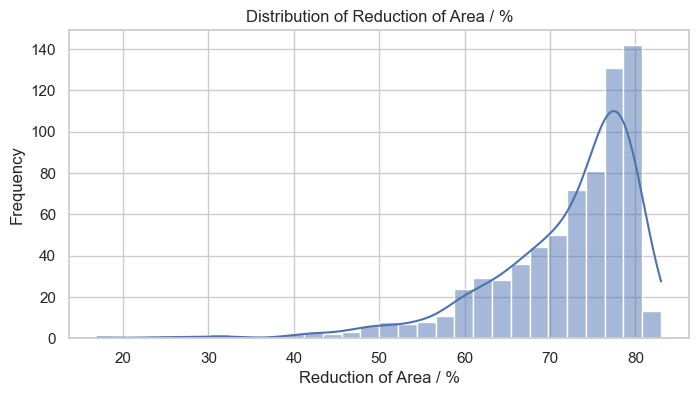

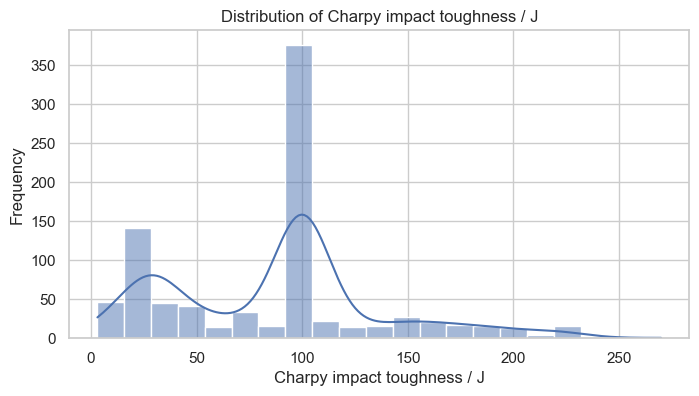

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each potential target variable
for target in potential_targets:
    if target in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[target], kde=True)
        plt.title(f'Distribution of {target}')
        plt.xlabel(target)
        plt.ylabel('Frequency')
        plt.show()


# Understanding the Significance of Potential Target Variables

1. **Yield Strength / MPa**
   - *Definition*: Stress at which a material begins to deform plastically.
   - *Significance*: Indicates the load a weld can withstand before permanent deformation.
   - **Note**: This is measured via destructive testing (tensile tests), meaning it cannot be used directly as a feature in a predictive model for production welds because testing would destroy the weld. Therefore, a model predicting yield strength must rely on non-destructive features.

2. **Ultimate Tensile Strength / MPa**
   - *Definition*: Maximum stress a material can withstand while being stretched or pulled.
   - *Significance*: Reflects the maximum strength of the weld.
   - **Note**: Like yield strength, ultimate tensile strength requires a destructive tensile test. As a result, it cannot be used directly as a feature in production but can be predicted using non-destructive test data.

3. **Elongation / %**
   - *Definition*: Measure of ductility, the ability to deform before fracture.
   - *Significance*: Higher elongation means the weld can absorb more energy before failing.
   - **Note**: Elongation is also derived from a destructive tensile test, making it unsuitable for direct use as a feature in production settings. A predictive model should infer elongation using other non-destructive tests.

4. **Reduction of Area / %**
   - *Definition*: Percentage reduction of cross-sectional area at fracture.
   - *Significance*: Another measure of ductility and toughness.
   - **Note**: Since this is measured via destructive testing (tensile test), it cannot be directly used in a production predictive model but can be predicted using other non-destructive features.

5. **Charpy Impact Toughness / J**
   - *Definition*: Energy absorbed by the material during fracture in an impact test.
   - *Significance*: Indicates the material's ability to withstand sudden impacts, important for brittle fracture prevention.
   - **Note**: This test requires breaking the material, making it destructive. Thus, it cannot be directly measured in production welds. However, predicting Charpy toughness using non-destructive features is important in ensuring weld quality, especially in safety-critical applications.

---

### Reflection on Destructive vs. Non-Destructive Tests:

- **Destructive Tests**: Properties like yield strength, ultimate tensile strength, elongation, reduction of area, Charpy toughness, and 50% FATT are crucial for evaluating weld quality but can only be measured via destructive testing. Since these tests cannot be applied to production welds (as they break the material), these variables **cannot be directly used as features** in a predictive model for production.

- **Non-Destructive Tests**: Hardness, along with other non-destructive evaluation methods (e.g., ultrasonic, radiographic), can be safely measured on production welds. These features are practical to collect during production and can be used as inputs for the predictive model.

### **Conclusion**:

For the model to be useful in evaluating the quality of a weld **without breaking it**, the focus should be on building a predictive model using non-destructive features to infer mechanical properties that typically require destructive testing, such as tensile strength or Charpy impact toughness. By leveraging non-destructive data, we can ensure that the welds remain intact while still making reliable predictions about their quality.


In [282]:
# Separate df into training and testing sets
from sklearn.model_selection import train_test_split

target_variables = ["Yield strength / MPa", "Ultimate tensile strength / MPa", "Elongation / %", "Reduction of Area / %", "Charpy impact toughness / J", "Charpy temperature"]

numerical_features = numerical_cols.drop(target_variables)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(target_variables, axis=1), df[target_variables], test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1321, 38)
X_test shape: (331, 38)


In [283]:
# Since we will apply PCA, standardization is necessary
scaler_X = StandardScaler()

# Replace the original numerical columns with the scaled ones
X_train_scaled = X_train.copy()
X_train_scaled[numerical_features] = scaler_X.fit_transform(X_train[numerical_features])
X_test_scaled = X_test.copy()
X_test_scaled[numerical_features] = scaler_X.transform(X_test[numerical_features])

scaler_Y = StandardScaler()

Y_train_scaled = Y_train.copy()
Y_train_scaled[target_variables] = scaler_Y.fit_transform(Y_train[target_variables])
Y_test_scaled = Y_test.copy()
Y_test_scaled[target_variables] = scaler_Y.transform(Y_test[target_variables])

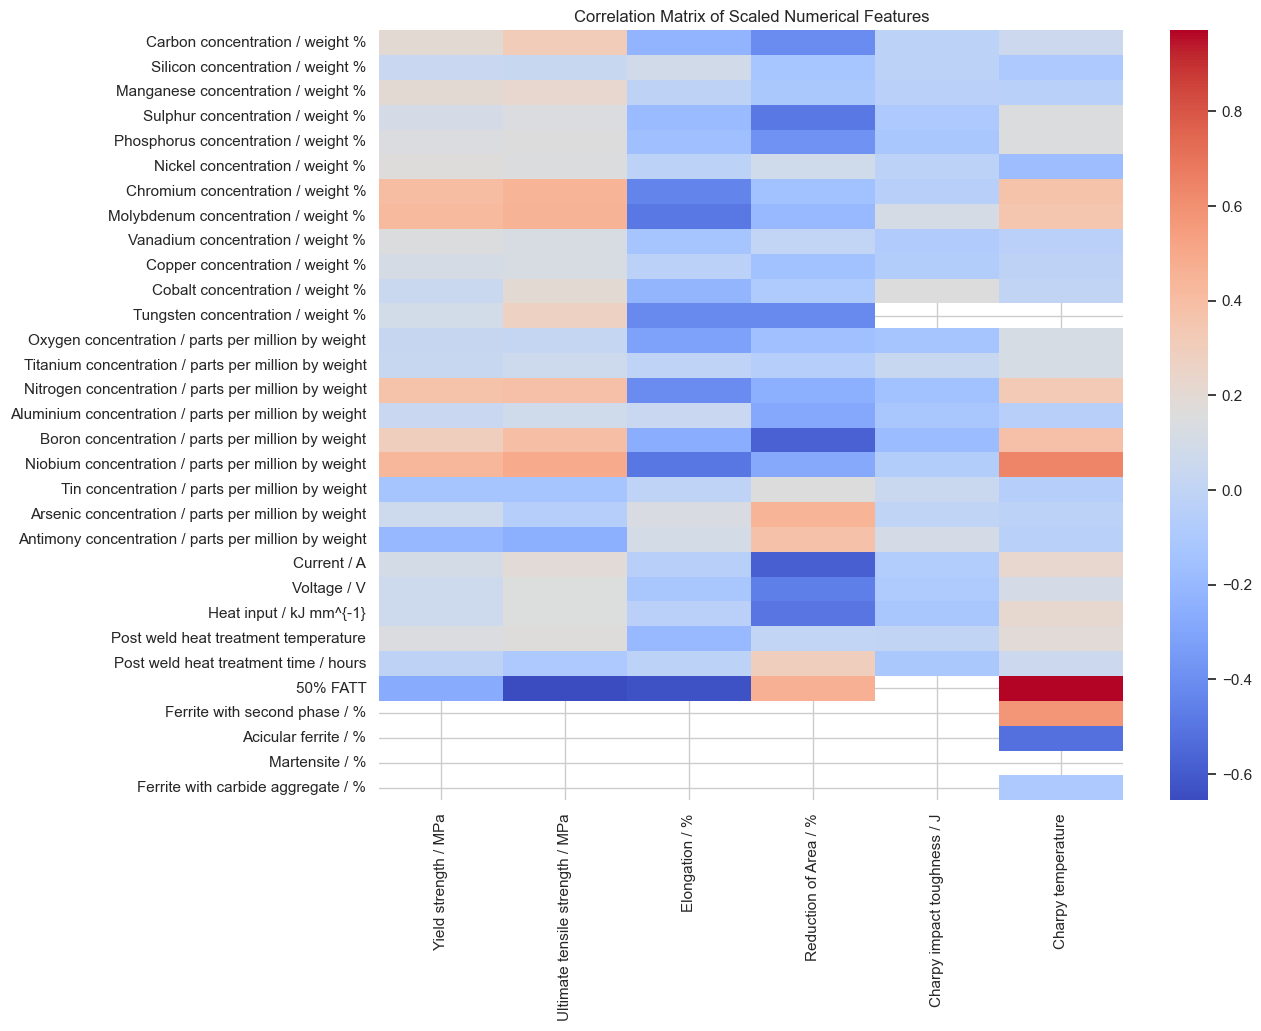

In [284]:
# Compute correlation matrix of scaled numerical features with target variables

X_and_Y_train = X_train_scaled.copy()
X_and_Y_train[target_variables] = Y_train_scaled.copy()

corr_matrix = X_and_Y_train[numerical_cols].corr()

# Show target_variables as columns and features as rows
corr_matrix = corr_matrix[target_variables].T.drop(target_variables, axis=1).T

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Scaled Numerical Features')
plt.show()


In [285]:
# Count missing values per column
missing_values = X_train_scaled.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Carbon concentration / weight %                             0
Silicon concentration / weight %                            0
Manganese concentration / weight %                          0
Sulphur concentration / weight %                            4
Phosphorus concentration / weight %                         8
Nickel concentration / weight %                           751
Chromium concentration / weight %                         688
Molybdenum concentration / weight %                       678
Vanadium concentration / weight %                         576
Copper concentration / weight %                           853
Cobalt concentration / weight %                          1213
Tungsten concentration / weight %                        1258
Oxygen concentration / parts per million by weight        312
Titanium concentration / parts per million by weight      584
Nitrogen concentration / parts per million by weight      366
Aluminium concentration / parts per million

In [286]:
def impute_missing_values():
    global X_train_scaled, X_train_scaled_imputed, X_test_scaled, X_test_scaled_imputed

    # Decide on a threshold for acceptable missing data (e.g., drop columns with >50% missing)
    threshold = 0.5 * len(X_train_scaled)

    # Drop columns with too many missing values
    columns_to_keep = missing_values[missing_values <= threshold].index
    X_train_scaled = X_train_scaled[columns_to_keep]

    X_train_scaled_imputed = X_train_scaled.copy()

    # Impute remaining missing values
    # For numerical columns, fill with median
    numerical_cols_X = X_train_scaled.select_dtypes(include=['float64', 'int64']).columns
    X_train_scaled_imputed[numerical_cols_X] = X_train_scaled[numerical_cols_X].fillna(X_train_scaled[numerical_cols_X].median())

    # For categorical columns, fill with mode
    categorical_cols_X = X_train_scaled.select_dtypes(include=['object']).columns
    X_train_scaled_imputed[categorical_cols_X] = X_train_scaled[categorical_cols_X].fillna(X_train_scaled[categorical_cols_X].mode().iloc[0])

    # Impute X_test_scaled in the same way
    X_test_scaled = X_test_scaled[columns_to_keep]
    X_test_scaled_imputed = X_test_scaled.copy()
    X_test_scaled_imputed[numerical_cols_X] = X_test_scaled[numerical_cols_X].fillna(X_train_scaled[numerical_cols_X].median())
    X_test_scaled_imputed[categorical_cols_X] = X_test_scaled[categorical_cols_X].fillna(X_train_scaled[categorical_cols_X].mode().iloc[0])

# impute_missing_values()

In [287]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
import numpy as np
import pandas as pd

def impute_missing_values():
    global X_train_scaled, X_train_scaled_imputed, X_test_scaled, X_test_scaled_imputed, numerical_cols_X, categorical_cols_X

    # Decide on a threshold for acceptable missing data (e.g., drop columns with >50% missing)
    threshold = 0.5 * len(X_train_scaled)

    # Drop columns with too many missing values
    columns_to_keep = missing_values[missing_values <= threshold].index
    X_train_scaled = X_train_scaled[columns_to_keep]

    numerical_cols_X = numerical_cols_X.intersection(columns_to_keep)

    X_train_scaled_imputed = X_train_scaled.copy()
    
    # Impute remaining missing values with MICE
    imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)
    X_train_scaled_imputed[numerical_cols_X] = imputer.fit_transform(X_train_scaled[numerical_cols_X])
    X_train_scaled_imputed[categorical_cols_X] = X_train_scaled[categorical_cols_X]

    # Impute X_test_scaled in the same way
    X_test_scaled = X_test_scaled[columns_to_keep]
    X_test_scaled_imputed = X_test_scaled.copy()
    X_test_scaled_imputed[numerical_cols_X] = imputer.transform(X_test_scaled[numerical_cols_X])
    X_test_scaled_imputed[categorical_cols_X] = X_test_scaled[categorical_cols_X]

impute_missing_values()


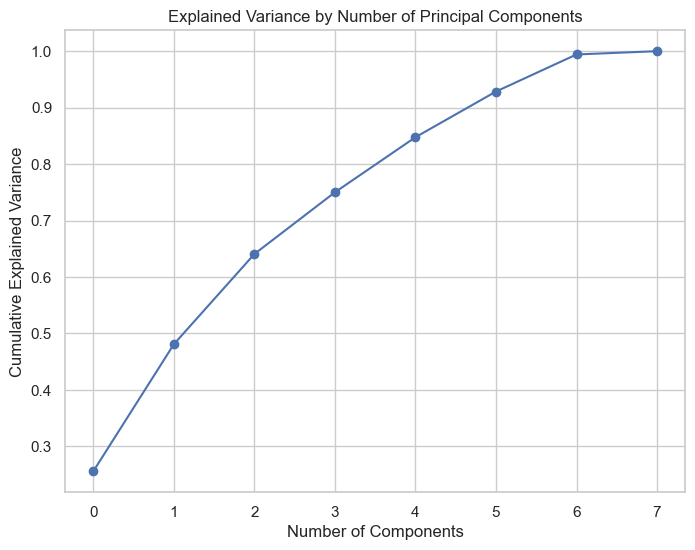

In [288]:
# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_train_scaled_imputed[numerical_cols_X])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

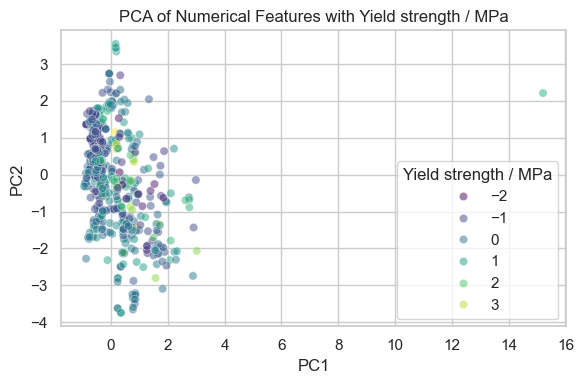

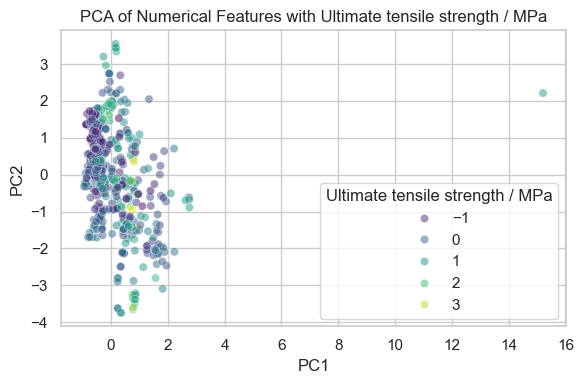

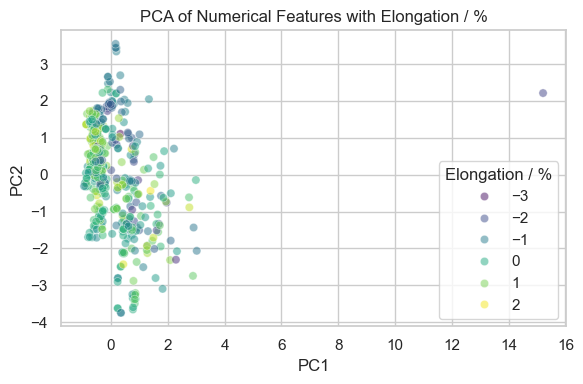

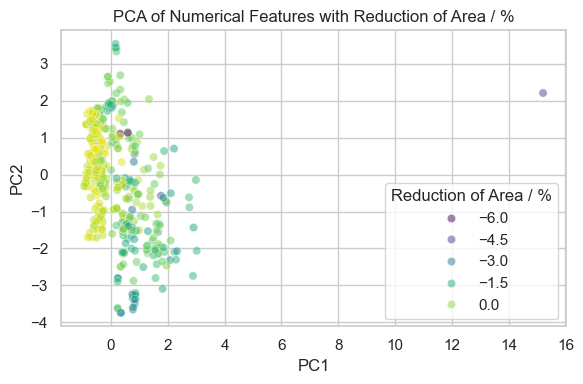

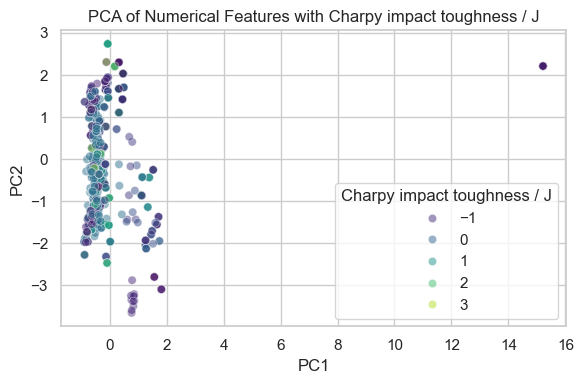

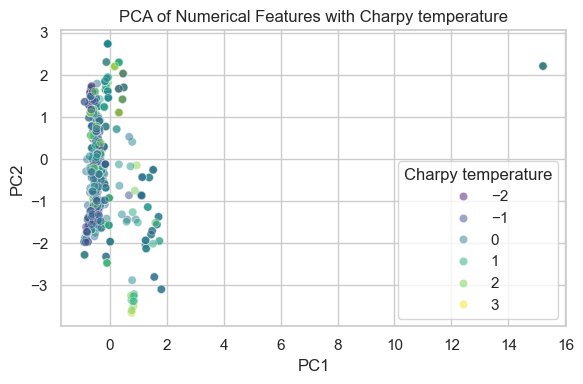

In [289]:
# Choose the number of components that explain a sufficient amount of variance
n_components = 2  # Adjust based on the cumulative explained variance

# Apply PCA with n_components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_train_scaled_imputed[numerical_cols_X])

# Create a DataFrame with principal components
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# If a target variable exists, include it for visualization
# Assuming 'Charpy impact toughness / J' is the target variable
for target in target_variables:
    df_pca[target] = Y_train_scaled[target].values

    # Plot the first two principal components colored by the target variable
    fig, axes = plt.subplots(1, 1, figsize=(6, 4))
    sns.scatterplot(
        x='PC1', y='PC2',
        hue=target,
        palette='viridis',
        data=df_pca,
        legend='brief',
        alpha=0.5,
    )
    plt.title(f'PCA of Numerical Features with {target}')
    plt.tight_layout()
    plt.show()


## **Part 3: Applying Machine Learning Approaches to Predict Weld Quality**

### **Overview**

In this section, we will apply various machine learning (ML) models to predict the quality of welds based on the preprocessed data. Given that the dataset is partially labeled (each target column is approximately half-filled and almost no row has all targets), we will:

1. **Focus on a Single Target Variable**: Due to the high number of missing values across multiple targets, we'll start by selecting the target variable with the most available data.
2. **Apply Supervised Learning Models**: Implement standard regression models.
3. **Implement Semi-Supervised Learning**: Utilize self-training techniques to leverage unlabeled data.
4. **Perform Rigorous Cross-Validation**: Ensure robust evaluation of model performance.
5. **Compare Model Performances**: Analyze and compare the effectiveness of different models using appropriate metrics.

---

### **Step 1: Selecting the Target Variable**

We'll choose **"Charpy impact toughness / J"** as our target variable since it has the most available data among the potential targets.

In [322]:
# Define the target variable
target = target_variables[3]

# Y_train is a matrix with all target variables, y_train is a vector with a unique target variable
y_train = Y_train_scaled[target]
y_test = Y_test_scaled[target]

# Check the number of non-missing values for the target
non_missing_target = y_train.notnull().sum()
print(f"Number of non-missing values for '{target}': {non_missing_target} out of {len(df)}")

Number of non-missing values for 'Charpy temperature': 708 out of 1652


In [323]:
# Separate labeled and unlabeled data
labeled_mask = y_train.notnull()

print("Shape of X_train_scaled_imputed:", X_train_scaled_imputed.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of labeled_mask:", labeled_mask.shape)

X_train_labeled = X_train_scaled_imputed[labeled_mask]
y_train_labeled = y_train[labeled_mask]

X_train_unlabeled = X_train_scaled_imputed[~labeled_mask]

print("Labeled training set shape:", X_train_labeled.shape)
print("Unlabeled training set shape:", X_train_unlabeled.shape)

labeled_mask_test = y_test.notnull()
X_test_labeled = X_test_scaled_imputed[labeled_mask_test]
y_test_labeled = y_test[labeled_mask_test]

print("Labeled test set shape:", X_test_labeled.shape)
print("Unlabeled test set shape:", X_test_scaled_imputed.shape)


Shape of X_train_scaled_imputed: (1321, 20)
Shape of y_train: (1321,)
Shape of labeled_mask: (1321,)
Labeled training set shape: (708, 20)
Unlabeled training set shape: (613, 20)
Labeled test set shape: (171, 20)
Unlabeled test set shape: (331, 20)


In [324]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()  # Adjust based on explained variance

# Fit PCA on labeled training data and transform
X_train_labeled_pca = pca.fit_transform(X_train_labeled[numerical_cols_X])

# Transform the unlabeled training data
X_train_unlabeled_pca = pca.transform(X_train_unlabeled[numerical_cols_X])

# Transform the test data
X_test_labeled_pca = pca.transform(X_test_labeled[numerical_cols_X])

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by the first {len(explained_variance)} principal components: {explained_variance}")


Explained variance by the first 8 principal components: [0.36978681 0.22331932 0.12883635 0.09657374 0.08302875 0.05393778
 0.04188532 0.00263193]


In [325]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
import numpy as np

# Add Dummy models for Mean and Median predictions
basic_models = {
    'Mean Model': DummyRegressor(strategy='mean'),
    'Median Model': DummyRegressor(strategy='median')
}

# Initialize your advanced models including XGBoost
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# Merge basic and advanced models into one dictionary
all_models = {**basic_models, **models}

# Dictionary to store cross-validation results
cv_results = {}

print("Predicting:", target + "\n")

# Perform 5-fold cross-validation for each model
for name, model in all_models.items():
    # Negative MSE for scoring; higher is better, so we take negative
    neg_mse = cross_val_score(model, X_train_labeled_pca, y_train_labeled, 
                              cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-neg_mse)
    cv_results[name] = rmse
    print(f"{name} - RMSE: {rmse.mean():.2f} ± {rmse.std():.2f}")

    # RMSE with X_test_labeled and y_test_labeled
    model.fit(X_train_labeled_pca, y_train_labeled)
    y_pred = model.predict(X_test_labeled_pca)
    rmse_test = np.sqrt(mean_squared_error(y_test_labeled, y_pred))
    print(f"{name} - RMSE on test set: {rmse_test:.2f}")
    print()


Predicting: Charpy temperature

Mean Model - RMSE: 1.00 ± 0.05
Mean Model - RMSE on test set: 1.20

Median Model - RMSE: 1.01 ± 0.05
Median Model - RMSE on test set: 1.21

Linear Regression - RMSE: 0.96 ± 0.05
Linear Regression - RMSE on test set: 1.13

Random Forest - RMSE: 0.96 ± 0.08
Random Forest - RMSE on test set: 1.04

Gradient Boosting - RMSE: 0.93 ± 0.08
Gradient Boosting - RMSE on test set: 1.02

Support Vector Machine - RMSE: 0.91 ± 0.06
Support Vector Machine - RMSE on test set: 0.97

XGBoost - RMSE: 1.02 ± 0.07
XGBoost - RMSE on test set: 1.08



In [326]:
# Use self-training to fill in missing values in the unlabeled set

from sklearn.base import clone

# Define the base estimator
base_estimator = RandomForestRegressor(n_estimators=100, random_state=42)

# Number of self-training iterations
n_iterations = 15

# Confidence threshold for adding pseudo-labels
confidence_threshold = 0.70

# Initialize labeled and unlabeled datasets
X_current = X_train_labeled_pca
Y_current = y_train_labeled.copy()

X_unlabeled_current = X_train_unlabeled_pca
y_unlabeled_current = np.full(shape=(X_unlabeled_current.shape[0],), fill_value=np.nan)

for iteration in range(n_iterations):
    print(f"Self-Training Iteration {iteration + 1}")
    
    # Clone the base estimator to ensure fresh models each iteration
    model = clone(base_estimator)
    
    # Fit the model on the current labeled data
    model.fit(X_current, Y_current)
    
    # Predict on the unlabeled data
    y_unlabeled_pred = model.predict(X_unlabeled_current)
    
    # Calculate prediction confidence (e.g., inverse of prediction variance)
    # For Random Forest, use the standard deviation of predictions from all trees
    all_tree_preds = np.array([tree.predict(X_unlabeled_current) for tree in model.estimators_])
    pred_std = all_tree_preds.std(axis=0)
    confidence = 1 / (1 + pred_std)  # Higher confidence for lower std

    print(f"Mean confidence: {confidence.mean():.2f}")

    # Select samples with confidence above the threshold
    high_confidence_mask = confidence >= confidence_threshold
    n_high_confidence = high_confidence_mask.sum()
    
    print(f"High confidence predictions to add: {n_high_confidence}")
    
    if n_high_confidence == 0:
        print("No high-confidence predictions available. Stopping self-training.")
        break
    
    # Add high-confidence pseudo-labeled data to the labeled set
    X_pseudo = X_unlabeled_current[high_confidence_mask]
    y_pseudo = y_unlabeled_pred[high_confidence_mask]
    
    X_current = np.vstack((X_current, X_pseudo))
    Y_current = np.concatenate((Y_current, y_pseudo))
    
    # Remove the pseudo-labeled samples from the unlabeled set
    X_unlabeled_current = X_unlabeled_current[~high_confidence_mask]
    print(f"Remaining unlabeled samples: {X_unlabeled_current.shape[0]}\n")


Self-Training Iteration 1
Mean confidence: 0.60
High confidence predictions to add: 79
Remaining unlabeled samples: 534

Self-Training Iteration 2
Mean confidence: 0.58
High confidence predictions to add: 9
Remaining unlabeled samples: 525

Self-Training Iteration 3
Mean confidence: 0.58
High confidence predictions to add: 6
Remaining unlabeled samples: 519

Self-Training Iteration 4
Mean confidence: 0.58
High confidence predictions to add: 16
Remaining unlabeled samples: 503

Self-Training Iteration 5
Mean confidence: 0.58
High confidence predictions to add: 10
Remaining unlabeled samples: 493

Self-Training Iteration 6
Mean confidence: 0.58
High confidence predictions to add: 5
Remaining unlabeled samples: 488

Self-Training Iteration 7
Mean confidence: 0.58
High confidence predictions to add: 4
Remaining unlabeled samples: 484

Self-Training Iteration 8
Mean confidence: 0.58
High confidence predictions to add: 1
Remaining unlabeled samples: 483

Self-Training Iteration 9
Mean confid

Self-Training Random Forest - RMSE: 0.84 ± 0.17
Self-Training Random Forest - RMSE on test set: 1.03


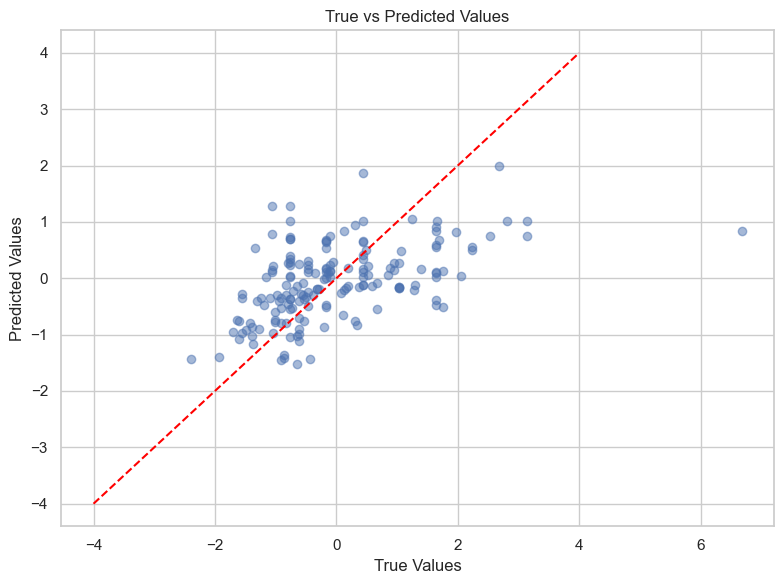

In [327]:
# Initialize the model
semi_supervised_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the expanded labeled dataset
semi_supervised_model.fit(X_current, Y_current)

# Perform cross-validation
neg_mse_ss = cross_val_score(semi_supervised_model, X_current, Y_current, 
                             cv=5, scoring='neg_mean_squared_error')
rmse_ss = np.sqrt(-neg_mse_ss)
cv_results['Self-Training Random Forest'] = rmse_ss

print(f"Self-Training Random Forest - RMSE: {rmse_ss.mean():.2f} ± {rmse_ss.std():.2f}")

# RMSE with X_test_labeled and y_test_labeled
y_pred = semi_supervised_model.predict(X_test_labeled_pca)
rmse_test = np.sqrt(mean_squared_error(y_test_labeled, y_pred))
print(f"Self-Training Random Forest - RMSE on test set: {rmse_test:.2f}")

# Plot the predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test_labeled, y_pred, alpha=0.5)
plt.plot([-4, 4], [-4, 4], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()